# Aula 2 - Aprendizagem Não Supervisionada
### Base de dados: Github do Curso e no link (https://github.com/datawaybr/CDKS-0003-FUNDAMENTOS-DE-MACHINE-LEARNING-NAO-SUPERVISIONADO-KICKSTART)

### Exemplo
- Link: https://github.com/datawaybr/CDKS-0003-FUNDAMENTOS-DE-MACHINE-LEARNING-NAO-SUPERVISIONADO-KICKSTART (referência: https://www.kaggle.com/datasets/jacksondivakarr/phone-classification-dataset/data)
  
- Descrição: Uma coleção de características que caracterizam telefones celulares, incluindo potência da bateria, especificações da câmera, suporte de rede, memória, dimensões da tela e outros atributos. A coluna 'faixa_de_preço' categoriza os telefones em faixas de preço, tornando este conjunto de dados adequado para tarefas de classificação de telefones celulares e previsão de preço.

- Problema de Negócio: Sua empresa precisa de um sistema inteligente que defina qual será a faixa de preço para uma lista de novos produtos que serão lançados ao longo do ano.
  
- Objetivo: Imagine que você foi responsável por identificar se há realmente 4 grupos de produtos para serem especificados de modo diferente entre si.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# link do git
df = pd.read_csv("bases/phone/dataset1.csv")
# df.drop(columns=['faixa_de_preço'], axis=1, inplace=True)
df

,potência_da_bateria,bluetooth,velocidade_do_processador,dual_sim,megapixels_câmera_frontal,4G,memória_interna,profundidade_móvel,peso_do_dispositivo,núcleos_do_processador,...,altura_do_pixel,largura_do_pixel,RAM,altura_da_tela,largura_da_tela,tempo_de_conversação,3G,tela_touch,wi-fi,faixa_de_preço
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [3]:
df.columns

Index(['potência_da_bateria', 'bluetooth', 'velocidade_do_processador',
       'dual_sim', 'megapixels_câmera_frontal', '4G', 'memória_interna',
       'profundidade_móvel', 'peso_do_dispositivo', 'núcleos_do_processador',
       'megapixels_câmera_principal', 'altura_do_pixel', 'largura_do_pixel',
       'RAM', 'altura_da_tela', 'largura_da_tela', 'tempo_de_conversação',
       '3G', 'tela_touch', 'wi-fi', 'faixa_de_preço'],
      dtype='object')

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='RAM', ylabel='potência_da_bateria'>

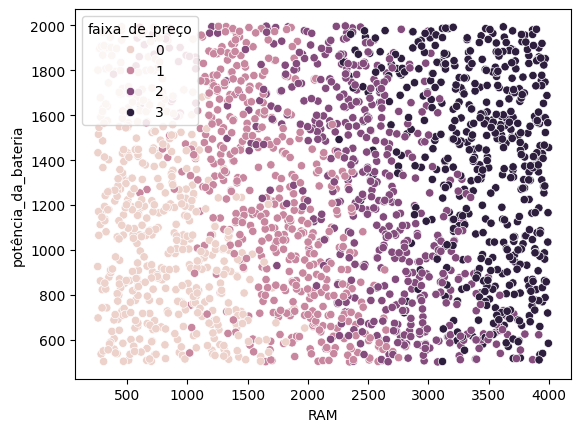

In [5]:
sns.scatterplot(data = df, x = 'RAM', y = 'potência_da_bateria', hue = 'faixa_de_preço')

<Axes: xlabel='RAM', ylabel='largura_do_pixel'>

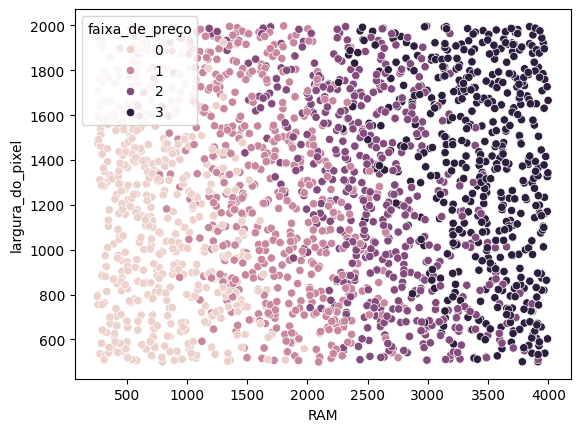

In [6]:
sns.scatterplot(data = df, x = 'RAM', y = 'largura_do_pixel', hue = 'faixa_de_preço')

<Axes: xlabel='largura_do_pixel', ylabel='RAM'>

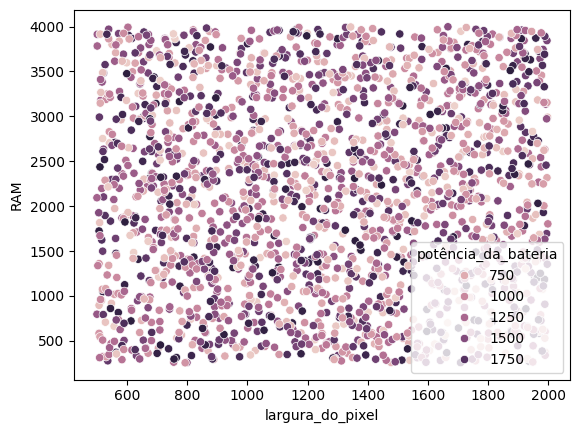

In [7]:
sns.scatterplot(data = df, x = 'largura_do_pixel', y = 'RAM', hue = 'potência_da_bateria')

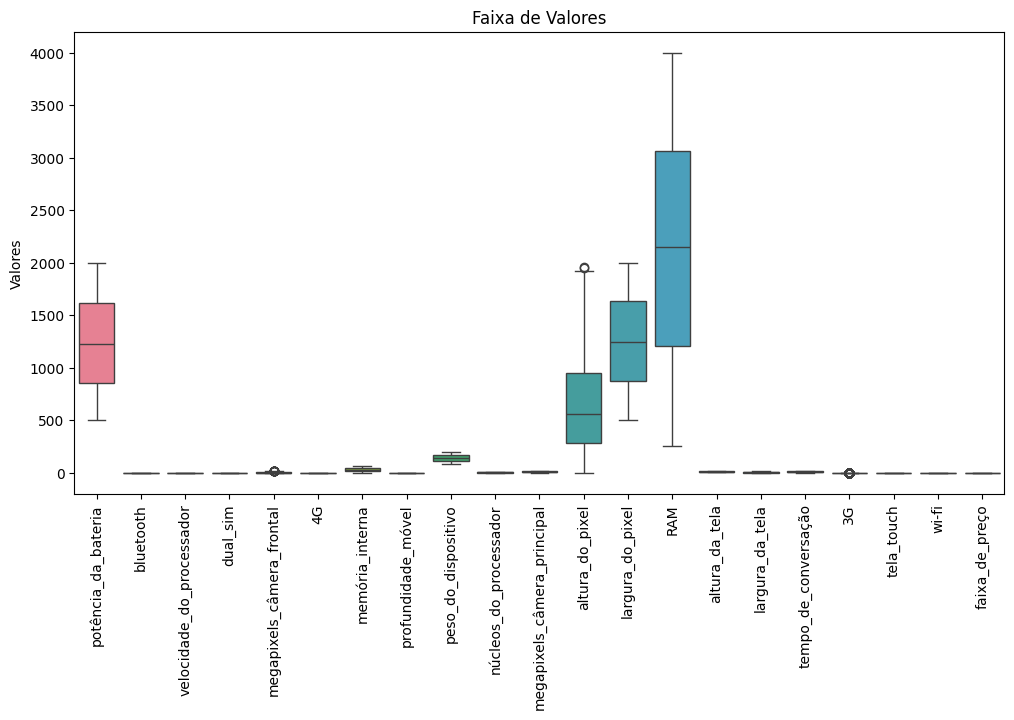

In [8]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.ylabel("Valores")
plt.title("Faixa de Valores")
plt.xticks(rotation=90)
plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   potência_da_bateria          2000 non-null   int64  
 1   bluetooth                    2000 non-null   int64  
 2   velocidade_do_processador    2000 non-null   float64
 3   dual_sim                     2000 non-null   int64  
 4   megapixels_câmera_frontal    2000 non-null   int64  
 5   4G                           2000 non-null   int64  
 6   memória_interna              2000 non-null   int64  
 7   profundidade_móvel           2000 non-null   float64
 8   peso_do_dispositivo          2000 non-null   int64  
 9   núcleos_do_processador       2000 non-null   int64  
 10  megapixels_câmera_principal  2000 non-null   int64  
 11  altura_do_pixel              2000 non-null   int64  
 12  largura_do_pixel             2000 non-null   int64  
 13  RAM               

----
## Preprocessando os dados

In [10]:
X = df.drop(columns=['faixa_de_preço'], axis=1)
y = df['faixa_de_preço']

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [12]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [13]:
type(X_train_norm)

numpy.ndarray

In [14]:
X_train_norm = pd.DataFrame(X_train_norm, columns=X.columns)
X_train_norm

,potência_da_bateria,bluetooth,velocidade_do_processador,dual_sim,megapixels_câmera_frontal,4G,memória_interna,profundidade_móvel,peso_do_dispositivo,núcleos_do_processador,megapixels_câmera_principal,altura_do_pixel,largura_do_pixel,RAM,altura_da_tela,largura_da_tela,tempo_de_conversação,3G,tela_touch,wi-fi
0,0.469899,0.000000,0.000361,0.000000,0.001546,0.000000,0.024216,0.000464,0.093774,0.001546,0.003091,0.373034,0.409100,0.680632,0.003607,0.001030,0.003091,0.000000,0.000515,0.000515
1,0.349815,0.000382,0.000191,0.000000,0.000000,0.000382,0.017949,0.000076,0.031315,0.001528,0.000382,0.438032,0.531978,0.633562,0.004201,0.003819,0.004201,0.000382,0.000382,0.000000
2,0.356342,0.000000,0.000425,0.000327,0.001635,0.000000,0.008827,0.000033,0.029750,0.001308,0.005231,0.535494,0.624416,0.441995,0.001635,0.000327,0.003596,0.000000,0.000327,0.000000
3,0.409882,0.000231,0.000692,0.000000,0.000692,0.000000,0.004613,0.000138,0.043364,0.001384,0.001153,0.117867,0.142086,0.892191,0.001153,0.000231,0.001615,0.000000,0.000231,0.000231
4,0.152234,0.000252,0.000631,0.000252,0.000757,0.000000,0.008836,0.000177,0.031810,0.000757,0.004039,0.174703,0.266851,0.934864,0.003282,0.000252,0.002272,0.000000,0.000000,0.000252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,0.626336,0.000380,0.000190,0.000000,0.000380,0.000380,0.006461,0.000342,0.053968,0.000760,0.001140,0.425285,0.470512,0.449989,0.002280,0.000760,0.000760,0.000380,0.000000,0.000380
1336,0.668386,0.000485,0.001018,0.000485,0.006786,0.000485,0.030535,0.000485,0.040229,0.000485,0.008240,0.100331,0.664024,0.315532,0.004362,0.002908,0.003393,0.000485,0.000485,0.000000
1337,0.355698,0.000309,0.000896,0.000309,0.000000,0.000000,0.009580,0.000185,0.039556,0.002472,0.000309,0.315833,0.482093,0.734573,0.005563,0.002472,0.004017,0.000000,0.000309,0.000000
1338,0.279233,0.000549,0.000329,0.000549,0.001097,0.000549,0.004937,0.000055,0.051019,0.002743,0.008229,0.623748,0.671475,0.281427,0.010423,0.005486,0.006583,0.000549,0.000000,0.000000


-----
## PCA

In [16]:
X_train_norm.columns

Index(['potência_da_bateria', 'bluetooth', 'velocidade_do_processador',
       'dual_sim', 'megapixels_câmera_frontal', '4G', 'memória_interna',
       'profundidade_móvel', 'peso_do_dispositivo', 'núcleos_do_processador',
       'megapixels_câmera_principal', 'altura_do_pixel', 'largura_do_pixel',
       'RAM', 'altura_da_tela', 'largura_da_tela', 'tempo_de_conversação',
       '3G', 'tela_touch', 'wi-fi'],
      dtype='object')

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
dfx_pca = pca.fit(X_train_norm)

print(dfx_pca.explained_variance_ratio_)

[6.44050553e-01 2.33096373e-01 1.02222209e-01 1.72724599e-02
 2.78171866e-03 4.18935211e-04 5.90346523e-05 3.74396854e-05
 3.14865314e-05 1.11191672e-05 9.80535045e-06 6.32468225e-06
 8.12613764e-07 4.06246085e-07 3.05971183e-07 3.00611781e-07
 2.83058001e-07 2.41102812e-07 9.64386769e-08 9.48083525e-08]


In [18]:
limite_importancia = 0.005
n_components = sum(dfx_pca.explained_variance_ratio_ > limite_importancia)
n_components

4

In [20]:
pca = PCA(n_components=n_components)
X_train_norm = pca.fit_transform(X_train_norm)

In [21]:
X_train_norm

array([[ 0.03099955, -0.03271715, -0.14523634, -0.04771086],
       [ 0.08751988, -0.2096255 , -0.10737231, -0.0399544 ],
       [ 0.30316009, -0.28657676, -0.12400696,  0.00467578],
       ...,
       [-0.04200595, -0.12811602, -0.04349615, -0.05129693],
       [ 0.44155811, -0.40177521, -0.14638029,  0.0992609 ],
       [-0.10979228, -0.0279381 , -0.06775664, -0.04371698]])

----
# Definir o melhor

In [22]:
#!pip install yellowbrick

In [23]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

import warnings 
warnings.filterwarnings('ignore')

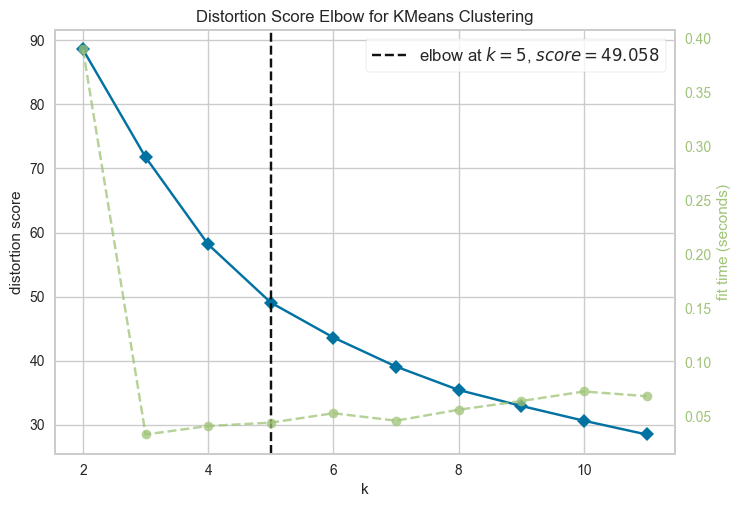

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))

visualizer.fit(X_train_norm)        
visualizer.show()

-------
## Implementação KMeans

In [25]:
from sklearn.cluster import KMeans

In [26]:
kmeans = KMeans(n_clusters=5, n_init="auto", random_state=42)
kmeans.fit(X_train_norm)

KMeans(n_clusters=5, n_init='auto', random_state=42)

In [27]:
kmeans.cluster_centers_

array([[-0.08178472, -0.15744919, -0.01592335, -0.02484872],
       [ 0.39184262, -0.1935923 , -0.01609482,  0.02249192],
       [ 0.0344725 ,  0.12114807, -0.01649674, -0.04235932],
       [-0.29549494,  0.03269567,  0.01327788,  0.0236802 ],
       [ 0.40139946,  0.1897126 ,  0.03497513,  0.02320634]])

----

In [30]:
## Verificando os valores dos centroides sem normalização

original_norms = np.linalg.norm(
    X_train[['potência_da_bateria', 'bluetooth', 'velocidade_do_processador', 'dual_sim']], 
    axis=0)

In [31]:
cluster_centers_ = (kmeans.cluster_centers_) * original_norms.reshape(1, -1)
cluster_centers_

array([[-3.93762850e+03, -4.07547123e+00, -1.01090444e+00,
        -6.56495410e-01],
       [ 1.88657572e+04, -5.01101233e+00, -1.02179052e+00,
         5.94229599e-01],
       [ 1.65972177e+03,  3.13584016e+00, -1.04730686e+00,
        -1.11911997e+00],
       [-1.42269768e+04,  8.46306412e-01,  8.42955238e-01,
         6.25623449e-01],
       [ 1.93258835e+04,  4.91058897e+00,  2.22041947e+00,
         6.13104199e-01]])

---
## Avaliação

In [32]:
from yellowbrick.cluster import InterclusterDistance

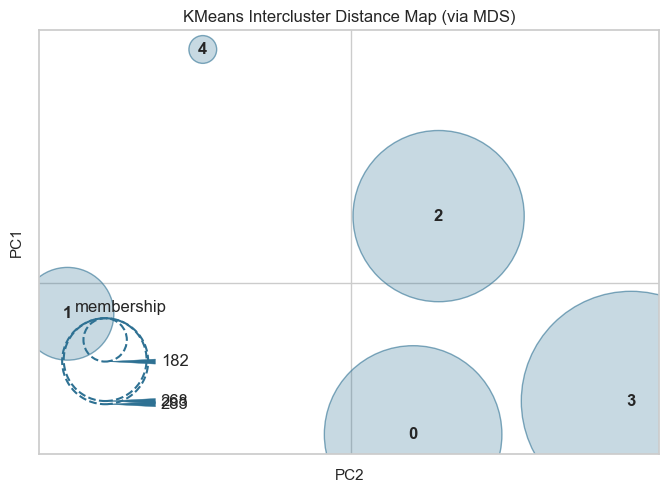

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [34]:
visualizer = InterclusterDistance(kmeans)

visualizer.fit(X_train_norm)
visualizer.show() 

In [35]:
from yellowbrick.cluster import SilhouetteVisualizer

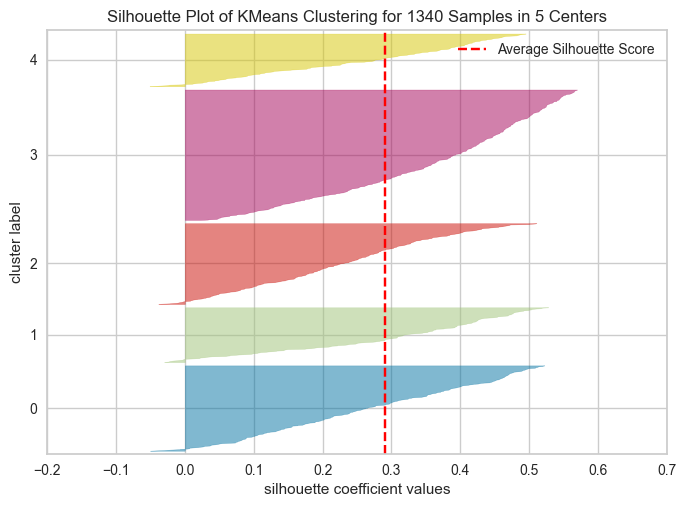

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [37]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

visualizer.fit(X_train_norm) 
visualizer.show()  

For k=2, Silhouette Score: 0.4293
For k=3, Silhouette Score: 0.3866
For k=4, Silhouette Score: 0.2968
For k=5, Silhouette Score: 0.2818
For k=6, Silhouette Score: 0.2750
For k=7, Silhouette Score: 0.2822
For k=8, Silhouette Score: 0.2678
For k=9, Silhouette Score: 0.2652


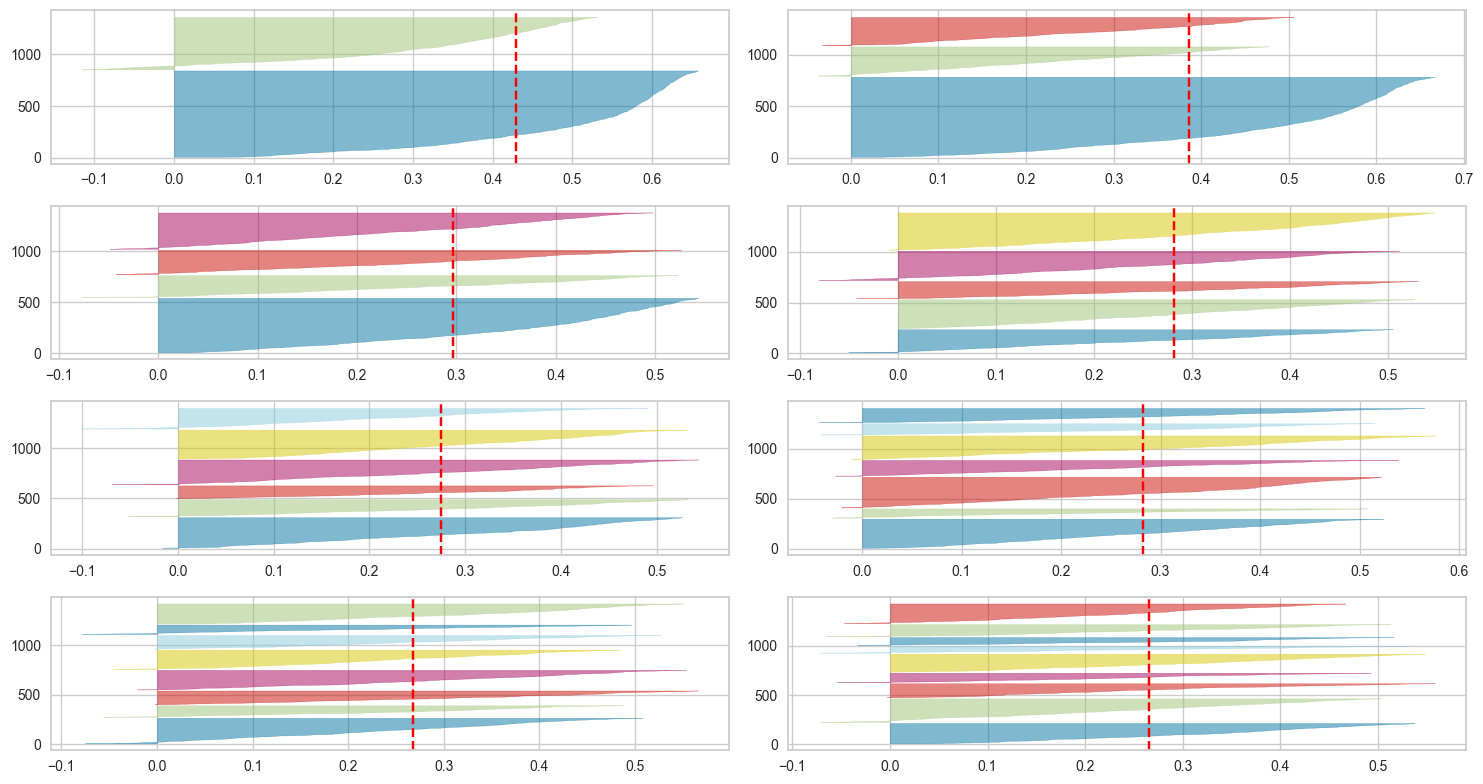

In [38]:
import math 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

selected_variables = X.columns
k_values = range(2, 10)  
fig, ax = plt.subplots(math.floor(max(k_values) / 2), 2, figsize=(15, 8))

for i, k in enumerate(k_values, 1):
    kmeans_ = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(k, 2)
    
    visualizer = SilhouetteVisualizer(kmeans_, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_train_norm)  # Fit the model and visualize the silhouette scores
    
    silhouette_score = visualizer.silhouette_score_
    print(f'For k={k}, Silhouette Score: {silhouette_score:.4f}')

plt.tight_layout()
plt.show()

-----
## Novos dados

In [39]:
X_test_norm

array([[3.96117668e-01, 2.49287393e-04, 1.49572436e-04, ...,
        2.49287393e-04, 2.49287393e-04, 2.49287393e-04],
       [3.30136823e-01, 0.00000000e+00, 1.84433979e-04, ...,
        2.63477113e-04, 2.63477113e-04, 2.63477113e-04],
       [8.83841687e-01, 0.00000000e+00, 1.31578074e-03, ...,
        0.00000000e+00, 4.53717498e-04, 0.00000000e+00],
       ...,
       [5.95705784e-01, 0.00000000e+00, 2.42403167e-04, ...,
        3.03003959e-04, 3.03003959e-04, 3.03003959e-04],
       [2.07549032e-01, 2.41336084e-04, 3.13736909e-04, ...,
        2.41336084e-04, 2.41336084e-04, 2.41336084e-04],
       [7.64962263e-01, 4.44745502e-04, 3.11321851e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [41]:
X_test_norm = pca.transform(X_test_norm)

kmeans.predict(X_test_norm)

array([3, 3, 4, 0, 0, 1, 3, 4, 4, 3, 1, 1, 3, 3, 0, 0, 0, 3, 1, 1, 3, 0,
       2, 0, 1, 4, 3, 1, 0, 1, 2, 3, 3, 0, 0, 2, 3, 3, 0, 0, 3, 4, 1, 3,
       4, 3, 2, 3, 4, 0, 2, 0, 1, 1, 1, 3, 3, 0, 1, 4, 2, 3, 4, 3, 1, 0,
       0, 4, 2, 4, 3, 3, 1, 2, 1, 2, 2, 3, 0, 4, 0, 3, 4, 3, 3, 3, 0, 1,
       2, 3, 2, 4, 4, 0, 0, 0, 2, 3, 3, 3, 0, 4, 3, 2, 2, 3, 4, 3, 2, 3,
       4, 4, 2, 0, 1, 3, 3, 0, 0, 0, 3, 4, 0, 4, 1, 3, 3, 2, 3, 3, 3, 3,
       2, 3, 4, 3, 3, 3, 0, 0, 4, 2, 0, 2, 0, 1, 3, 3, 1, 4, 0, 3, 1, 1,
       0, 2, 0, 0, 2, 0, 3, 1, 0, 1, 2, 2, 3, 1, 0, 0, 3, 2, 1, 3, 2, 3,
       0, 0, 4, 0, 3, 1, 3, 2, 0, 1, 1, 1, 2, 0, 0, 3, 3, 0, 1, 3, 1, 2,
       2, 3, 0, 3, 1, 2, 1, 0, 2, 0, 3, 0, 3, 1, 3, 3, 2, 3, 3, 2, 2, 2,
       3, 1, 3, 0, 3, 2, 3, 4, 1, 0, 3, 1, 0, 0, 1, 3, 2, 2, 1, 0, 0, 4,
       1, 2, 3, 2, 0, 0, 3, 0, 1, 3, 2, 2, 4, 2, 3, 1, 0, 3, 3, 3, 3, 0,
       2, 0, 3, 4, 0, 3, 3, 2, 0, 2, 0, 4, 2, 1, 3, 0, 3, 0, 4, 0, 1, 2,
       2, 3, 4, 4, 4, 0, 3, 3, 3, 3, 3, 3, 4, 3, 3,

In [43]:
# Dados fornecidos
dados = {
    'potência_da_bateria': [574.0],
    'bluetooth': [0.0],
    'velocidade_do_processador': [2.8],
    'dual_sim': [1.0],
    'megapixels_câmera_frontal': [16.0],
    '4G': [0.0],
    'memória_interna': [38.0],
    'profundidade_móvel': [0.1],
    'peso_do_dispositivo': [90.0],
    'núcleos_do_processador': [6.0],
    'megapixels_câmera_principal': [17.0],
    'altura_do_pixel': [286.0],
    'largura_do_pixel': [1171.0],
    'RAM': [3269.0],
    'altura_da_tela': [8.0],
    'largura_da_tela': [7.0],
    'tempo_de_conversação': [10.0],
    '3G': [0.0],
    'tela_touch': [1.0],
    'wi-fi': [0.0]
}

novo_dado = pd.DataFrame(dados)

In [44]:
novo_dado_norm = preprocessing.normalize(novo_dado, axis=1, norm='l2', copy=True, return_norm=False)
novo_dado_norm = pca.transform(novo_dado_norm)
novo_dado_norm

array([[-0.39198733, -0.10022376,  0.08161741,  0.06190981]])

In [45]:
kmeans.predict(novo_dado_norm)

array([3], dtype=int32)

-------